# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as stats

sns.set(color_codes=True)
sns.set_style("dark")
sns.set_context("poster")
matplotlib.rcParams['text.color'] = 'white'
        
monster = "fran"
filename = monster + "_20200401.csv"

BASE_STATS = {
    'HP': 10215,
    'ATTACK': 670,
    'DEFENSE': 461,
    'SPEED': 103,
    'CRIT_RATE': .15,
    'CRIT_DMG': .5,
    'ACCURACY%': 0,
    'RESISTANCE%': 15,
}

TOWERS = {
    'CRIT_DMG': .25,
    'SPEED': .15,
    'ATTACK': .20,
    'ATTACK_ELEMENT': .21,
    'DEFENSE': .20,
    'HP': .20,
}

BUFFS = {
    'ATTACK': 1.5,
    'SPEED': .3,
    'CRIT_RATE': .3,
    'DEFENSE': 1.5,
}

df = pd.read_csv(filename, index_col="ID")
df_full = pd.read_csv(filename, index_col="ID")
print(df.columns)
runes_cols = ["Rune #" + str(i) for i in range(1 ,7)]
df.dropna(subset=runes_cols, how='any', inplace=True) # delete without runes
df.sort_values(["Avg Eff"], ascending=False, inplace=True)
df

Index(['Level', 'Stars', 'HP', 'Attack', 'Defense', 'Speed', 'Resistance',
       'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP',
       'Eff. HP D-B', 'Sets', 'Skilled Up', 'Acquired', 'Locked',
       'Transmogrified', 'Rune #1', 'Rune #2', 'Rune #3', 'Rune #4', 'Rune #5',
       'Rune #6'],
      dtype='object')


,Level,Stars,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,...,Skilled Up,Acquired,Locked,Transmogrified,Rune #1,Rune #2,Rune #3,Rune #4,Rune #5,Rune #6
ID,,,,,,,,,,,,,,,,,,,,,
12193433404,40,6,37301,1638,1046,288,49,0,26,50,...,Yes,2018-09-10 06:03:20,No,No,ATK+,SPD,DEF+,HP%,HP+,HP%
12190512029,40,6,37816,1409,1032,279,15,19,20,50,...,Yes,2018-09-09 19:16:02,No,No,ATK+,SPD,DEF+,HP%,HP+,HP%
12278013656,40,6,29052,1025,1354,279,33,23,27,79,...,Yes,2018-09-25 18:20:09,No,No,ATK+,SPD,DEF+,HP%,HP+,DEF%
2885523735,40,6,36554,1226,1037,265,29,9,20,56,...,Yes,2015-03-13 02:18:54,No,No,ATK+,SPD,DEF+,HP%,HP+,HP%
12191380022,40,6,34474,1072,1072,265,54,18,15,66,...,Yes,2018-09-09 23:18:10,No,No,ATK+,SPD,DEF+,HP%,HP+,HP%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12182183674,35,5,14147,1130,489,132,24,15,19,57,...,No,2018-09-08 09:07:11,No,No,ATK+,ATK%,DEF+,HP%,HP+,ATK%
14663641326,35,5,9341,1057,569,106,15,13,39,64,...,No,2019-12-06 05:54:25,No,No,ATK+,DEF%,DEF+,ATK+,HP+,ATK+
15152828346,24,5,9142,515,445,125,60,23,32,67,...,No,2020-03-09 13:15:30,No,No,ATK+,SPD,DEF+,HP+,HP+,RES%


# Stars Distribution, picking 6*

(371, 24)


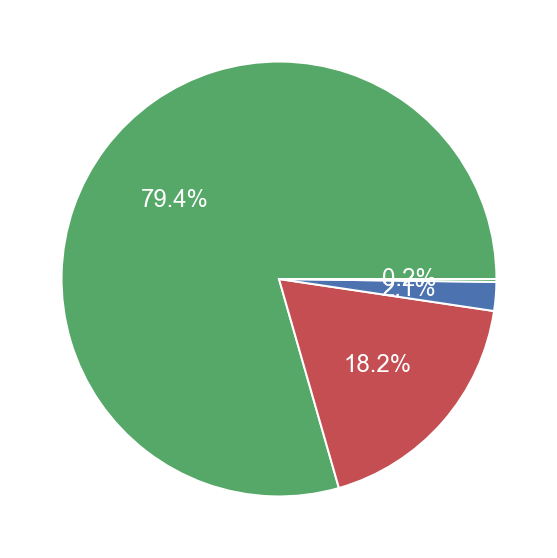

In [2]:
fig = plt.figure(figsize=(10, 10))
stars = df["Stars"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r', 'b'])
plt.savefig(monster + "_pie_6stars.png", transparent=True, bbox_inches = "tight")
df_stars6 = df[df["Stars"] == 6] # pick only 6*
print(df_stars6.shape)

# Skilled Up

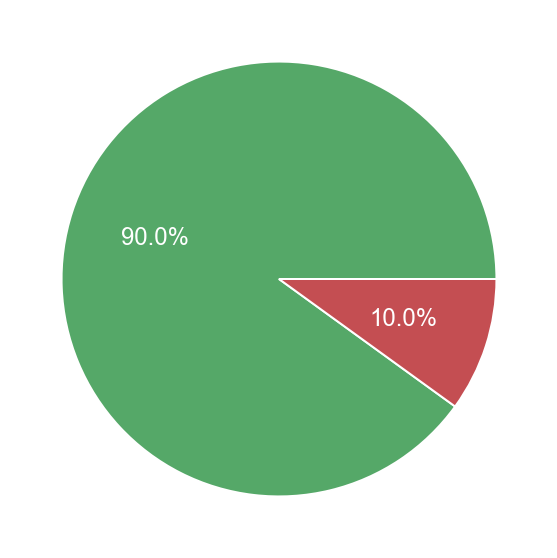

In [3]:
fig = plt.figure(figsize=(10, 10))
stars = df_stars6["Skilled Up"].value_counts()
plt.pie(stars, labels=stars.index, autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_skillups.png", transparent=True, bbox_inches = "tight")
plt.show()

# Runes 

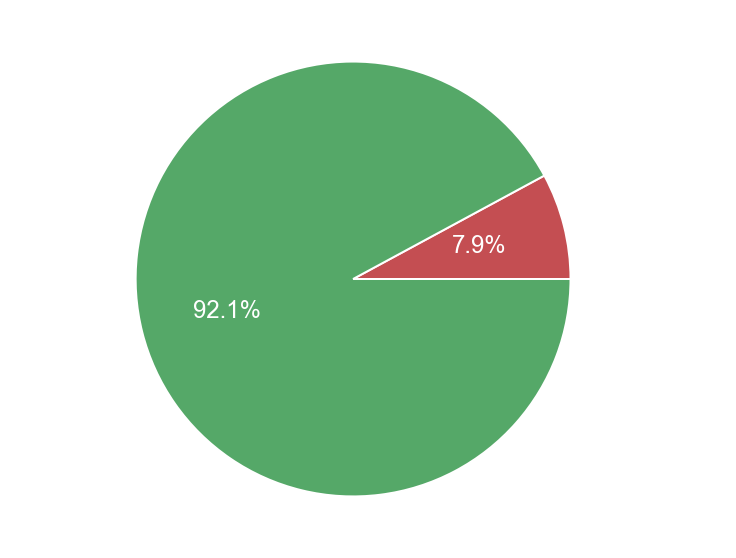

In [5]:
fig = plt.figure(figsize=(10, 10))
df_runes = {
    'Without Runes': df_full.shape[0] - df.shape[0],
    'With Runes': df.shape[0],
}
plt.pie(df_runes.values(), labels=df_runes.keys(), autopct='%1.1f%%', colors=['r', 'g'])
plt.savefig(monster + "_pie_runes.png", transparent=True, bbox_inches = "tight")
plt.show()

# ???????????????? Tanky vs DMG Dealer ????????????????

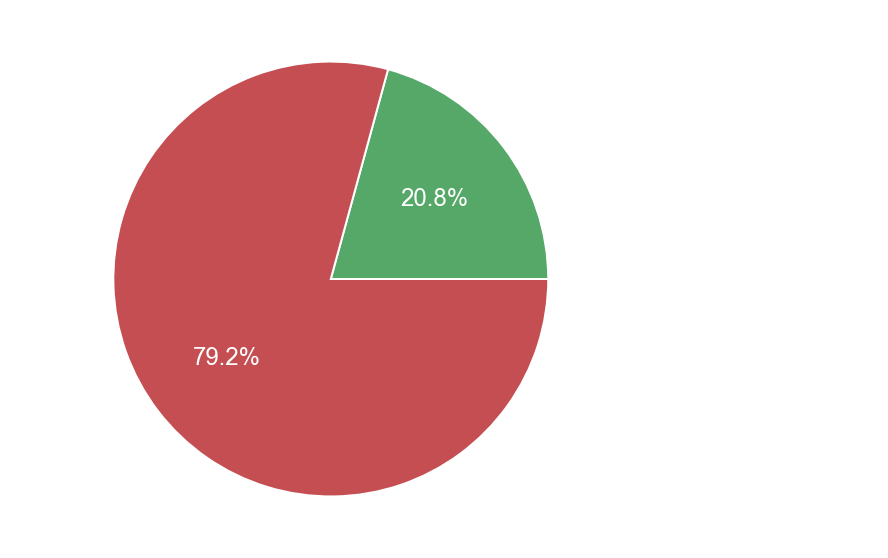

In [29]:
fig = plt.figure(figsize=(10, 10))
dmg_dealer_df = df_stars6[(df_stars6["Crit Rate"] > 60) & (df_stars6["Crit Dmg"] > 150)] # shows mons with 60%+ crit rate & 150%+ crit damage
pseudo_dmg_dealer_df = df_stars6[(df_stars6["Attack"] > 1500) & (df_stars6["Crit Rate"] < 60)]
pie_dmg_or_tanky = {
    'Pseudo - Damage Dealer [High ATK]': pseudo_dmg_dealer_df.shape[0],
    'Other [Tanky]': df_stars6.shape[0] - pseudo_dmg_dealer_df.shape[0] - dmg_dealer_df.shape[0],
}
plt.pie(pie_dmg_or_tanky.values(), labels=pie_dmg_or_tanky.keys(), autopct='%1.1f%%', colors=['g', 'r'])
plt.savefig(monster + "_pie_is_tanky.png", transparent=True, bbox_inches = "tight")
plt.show()

# Eff. HP Distribution

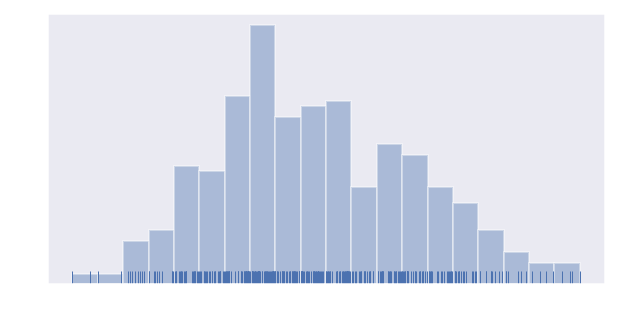

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_effhp.png", transparent=True, bbox_inches = "tight")

# Avg. Rune Distribution

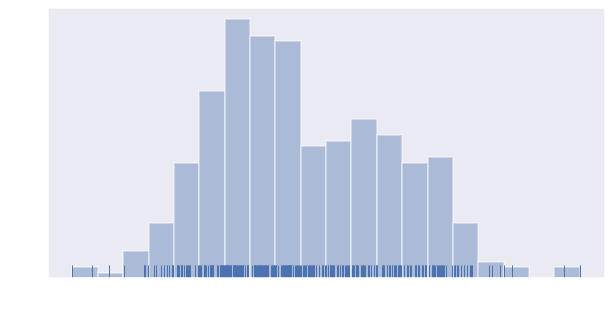

In [9]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Avg Eff"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_rune_eff.png", transparent=True, bbox_inches = "tight")

# Sets

Violent + Will             107
Energy + Violent            43
Violent                     30
Energy + Swift              26
Swift                       21
Revenge + Violent           20
Swift + Will                18
Shield + Violent            13
Revenge + Swift              6
Energy + Fatal               6
Endure + Violent             5
Focus + Violent              5
Fatal + Will                 5
Fight + Swift                5
Guard + Violent              4
Fight + Violent              4
Fatal                        4
Nemesis + Violent            3
Blade + Fatal                3
Shield + Swift               3
Fight + Fight + Will         3
Blade + Swift                3
Fatal + Revenge              2
Blade + Violent              2
Nemesis + Shield + Will      2
Focus + Swift                2
Name: Sets, dtype: int64


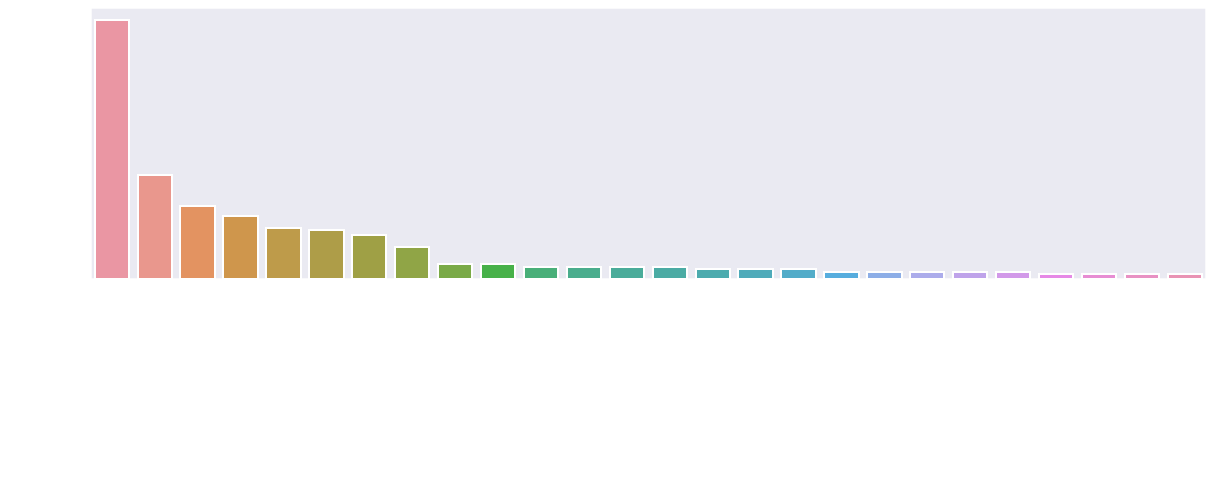

In [10]:
fig = plt.figure(figsize=(20, 5))
counts = df_stars6["Sets"].value_counts()
counts = counts[counts > 1]
print(counts)
x, y = counts.index, counts.values
sets = sns.barplot(x=x, y=y)
_ = sets.set_xticklabels(sets.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_sets.png", transparent=True, bbox_inches = "tight")

# Eff. HP Distribution for most common set

Violent + Will


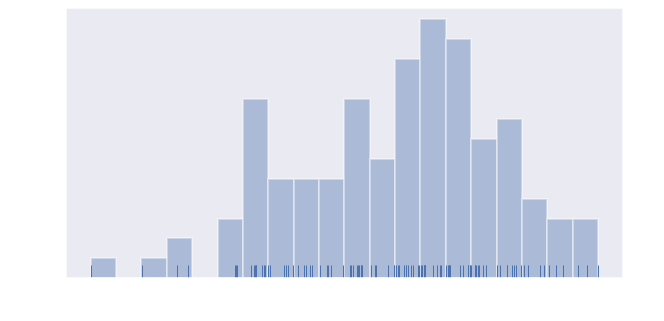

In [11]:
most_common_set = counts.index[0]
print(most_common_set)

fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Eff. HP"][df_stars6["Sets"] == most_common_set], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_common_set_effhp.png", transparent=True, bbox_inches = "tight")

# Speed Distribution

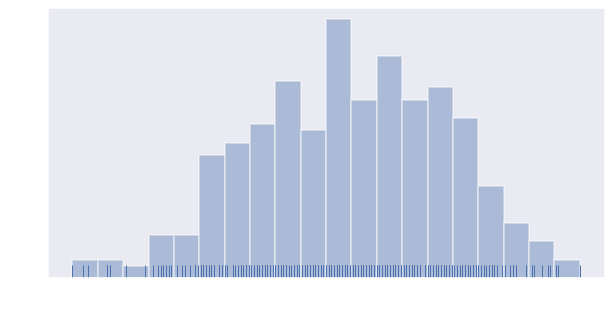

In [14]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"], bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed.png", transparent=True,  bbox_inches = "tight")

# Speed Distribution for TOP 10% Eff. HP

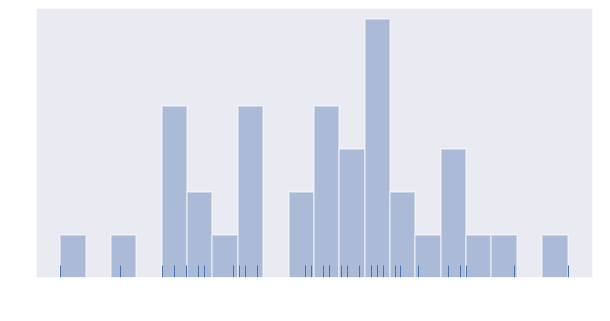

In [16]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_stars6["Speed"].head(int(df_stars6.shape[0] * .1)), bins=20, kde=False, rug=True).set_xlabel(None)
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_dist_speed_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Speed - Eff. HP Relation for TOP 10% Eff. HP

<Figure size 720x360 with 0 Axes>

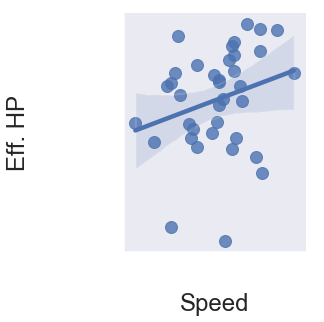

In [17]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x="Speed", y="Eff. HP", data=df_stars6.head(int(df_stars6.shape[0] * .1)))
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_rel_spd_dmg_top10_percent.png", transparent=True,  bbox_inches = "tight")

# Best by Category

In [18]:
cols = ['HP', 'Attack', 'Defense', 'Speed', 'Resistance', 'Accuracy', 'Crit Rate', 'Crit Dmg', 'Avg Eff', 'Eff. HP', 'Eff. HP D-B']
df_best = pd.DataFrame(columns=["ID"] + cols)
df_best.set_index("ID", drop=True, inplace=True)

best = list()
for column in cols:
    best.append(int(round(df.sort_values([column], ascending=False)[column].head(1).values[0])))
    
df_best.loc[1] = best
df_best

,HP,Attack,Defense,Speed,Resistance,Accuracy,Crit Rate,Crit Dmg,Avg Eff,Eff. HP,Eff. HP D-B
ID,,,,,,,,,,,
1,37816,2174,1553,297,95,70,108,150,119,156623,96355


# Most common Builds

   Rune #2 Rune #4 Rune #6  Count
27     SPD     HP%     HP%    179
16     SPD    ATK%     HP%     59
25     SPD     HP%    ATK%     33
26     SPD     HP%    DEF%     27
22     SPD    DEF%     HP%     25
13     SPD    ATK%    ATK%     14
2     ATK%     HP%    ATK%      5
0     ATK%    ATK%    ATK%      4
7      HP%     HP%    DEF%      3
6      HP%    ATK%     HP%      2
21     SPD    DEF%    DEF%      2


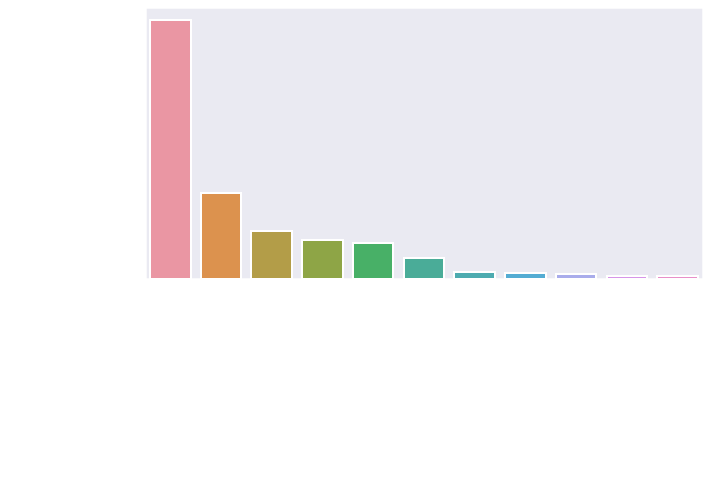

In [20]:
fig = plt.figure(figsize=(10, 5))

builds_count = df_stars6.groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
_ = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common.png", transparent=True, bbox_inches = "tight")

# Builds for most common set

   Rune #2 Rune #4 Rune #6  Count
10     SPD     HP%     HP%     64
4      SPD    ATK%     HP%     15
9      SPD     HP%    DEF%      9
7      SPD    DEF%     HP%      8
8      SPD     HP%    ATK%      4
3      SPD    ATK%    ATK%      2


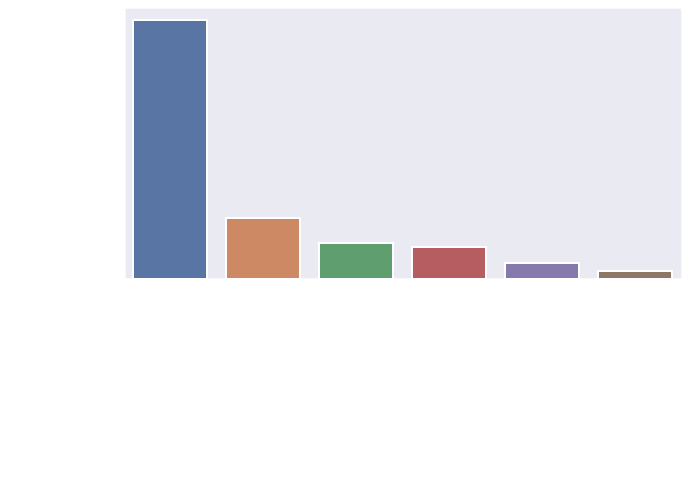

In [21]:
fig = plt.figure(figsize=(10, 5))
builds_count = df_stars6[df_stars6["Sets"] == most_common_set].groupby(["Rune #2", "Rune #4", "Rune #6"]).size().reset_index(name='Count')
builds_count = builds_count[builds_count['Count'] > 1].sort_values(["Count"], ascending=False) # single builds to drop
print(builds_count)
builds_count_to_plot = builds_count.set_index(["Rune #2", "Rune #4", "Rune #6"]).T

builds_common = sns.barplot(data=builds_count_to_plot)
ax = builds_common.set_xticklabels(builds_common.get_xticklabels(), rotation=45, horizontalalignment='right')
builds_common.tick_params(labelcolor='white')
plt.savefig(monster + "_build_common_set.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 2

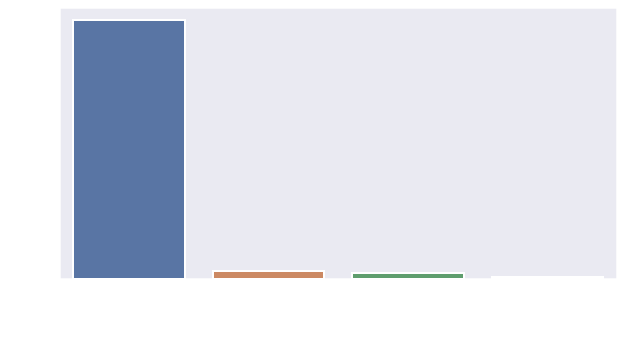

In [22]:
fig = plt.figure(figsize=(10, 5))

counts_slot2 = df_stars6["Rune #2"].value_counts()
counts_slot2 = counts_slot2[counts_slot2 > 1]
x, y = counts_slot2.index, counts_slot2.values
slot2 = sns.barplot(x=x, y=y)
_ = slot2.set_xticklabels(slot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_2.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 4

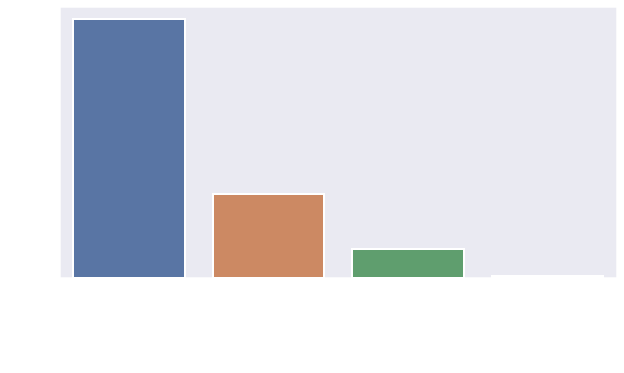

In [23]:
fig = plt.figure(figsize=(10, 5))

counts_slot4 = df_stars6["Rune #4"].value_counts()
counts_slot4 = counts_slot4[counts_slot4 > 1]
x, y = counts_slot4.index, counts_slot4.values
slot4 = sns.barplot(x=x, y=y)
_ = slot4.set_xticklabels(slot4.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_4.png", transparent=True, bbox_inches = "tight")

# Most frequent slot 6

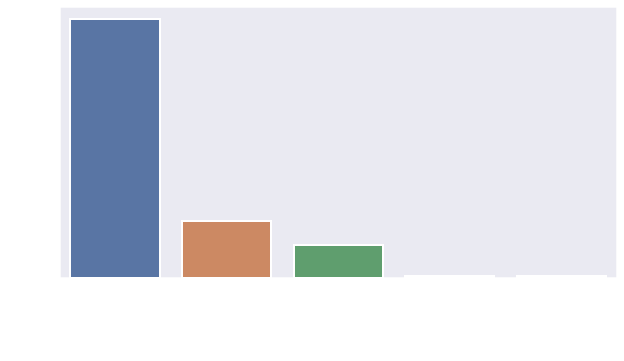

In [24]:
fig = plt.figure(figsize=(10, 5))

counts_slot6 = df_stars6["Rune #6"].value_counts()
counts_slot6 = counts_slot6[counts_slot6 > 1]
x, y = counts_slot6.index, counts_slot6.values
slot6 = sns.barplot(x=x, y=y)
_ = slot6.set_xticklabels(slot6.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tick_params(labelcolor='white')
plt.savefig(monster + "_slot_6.png", transparent=True, bbox_inches = "tight")